In [20]:
from briefcase.case import Case
from briefcase.case_base import CaseBase
import import_ipynb
import pandas as pd
import matplotlib.pyplot as plt
import MushroomsConverter as MC
import yaml
import big_dataset_utility.utils as BD

cmap = plt.colormaps['tab10']

def get_existing_test_data(cluster="corr", test_split="0.25"):

    filename = f"data/mushrooms-{cluster}-test-{test_split}.yaml"
    
    try:
        with open(filename, 'r') as file:
            data = yaml.safe_load(file)
        print(f"Loaded data successfully from '{filename}'")
    except FileNotFoundError:
        print(f"File '{filename}' not found.")
        print(f"Creating new file")
        data = MC.mushroom_to_yaml(cluster, float(test_split))
    except Exception as e:
        print("An error occurred:", str(e))
        
    return data 

def test_inconsistency(data):
    cases = [Case.from_dict(c) for c in data]
    cb = CaseBase(cases) 
    return cb.metrics()


def generate_data_and_plot(cluster="corr"):
    percentage_test = [0.05, 0.25, 0.5, 0.75]
    filter_perc_list = [3.441691376338086e-14, 1.072919530997782e-11, 9.08961794721134e-11, 2.892193151637994e-09]
    inconsistency_counts = []
    test_sizes = []
    filtered_inconsistency_counts = [[] for _ in range(len(filter_perc_list))]
    filtered_test_sizes = [[] for _ in range(len(filter_perc_list))]

    for idx, param in enumerate(percentage_test):
        test_data = get_existing_test_data(cluster, str(param))
        test_size, inconsistency_count = test_inconsistency(test_data)
        test_sizes.append(test_size)
        inconsistency_counts.append(inconsistency_count)
        
        # Filter data for each percentage and calculate inconsistency
        for i, filter_perc in enumerate(filter_perc_list):
            filtered_test_data = BD.filter_data_by_power(test_data, filter_perc)
            filtered_test_size, filtered_inconsistency_count = test_inconsistency(filtered_test_data)
            filtered_test_sizes[i].append(filtered_test_size) 
            filtered_inconsistency_counts[i].append(filtered_inconsistency_count)

    # Original data
    percentage_inconsistency = [((count / test_sizes[k]) * 100) for k, count in enumerate(inconsistency_counts)]
    plt.figure(figsize=(10, 6))
    plt.plot(percentage_test, percentage_inconsistency, marker='o', linestyle='-')
    plt.title(f'Percentage Total Cases Associated With Inconsistency vs Percentage Training Cases for {cluster.capitalize()} Labeling')
    plt.xlabel('Percentage Training Cases')
    plt.ylabel('Percentage of Cases Associated with Inconsistency')
    plt.grid(True)
    plt.show()

    # Plotting percentage of inconsistency vs percentage precedent cases for both sets of data
    plt.figure(figsize=(10, 6))
    for idx, filtered_inconsistency_count in enumerate(filtered_inconsistency_counts):
        percentage_inconsistency_filtered = []
        for k, count in enumerate(filtered_inconsistency_count):
            if count == 0:
                percentage_inconsistency_filtered.append(0)
            else:
                percentage_inconsistency_filtered.append(count / filtered_test_sizes[idx][k] * 100)
                
        plt.plot(percentage_test, percentage_inconsistency_filtered, marker='o', linestyle='-', label=f'Q{idx+1}', color=cmap(idx), alpha=0.7)
    plt.plot(percentage_test, percentage_inconsistency, marker='o', linestyle='-', label='ALL')
    plt.title(f'Percentage Total Cases Associated With Inconsistency vs Percentage Training Cases for {cluster.capitalize()} Labeling')
    plt.xlabel('Percentage Test Cases')
    plt.ylabel('Percentage of Cases Associated with Inconsistency')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    
    # Plotting percentage of inconsistency vs percentage precedent cases for both sets of data
    plt.figure(figsize=(10, 6))
    for idx, filtered_inconsistency_count in enumerate(filtered_inconsistency_counts):
        percentage_inconsistency_filtered = []
        for k, count in enumerate(filtered_inconsistency_count):
            if count == 0:
                percentage_inconsistency_filtered.append(0)
            else:
                percentage_inconsistency_filtered.append(count / filtered_test_sizes[idx][k] * 100)
                
        plt.plot(percentage_test, percentage_inconsistency_filtered, marker='o', linestyle='-', label=f'{filter_perc_list[idx]:.2f}% max power', color=cmap(idx), alpha=0.7)
    plt.plot(percentage_test, percentage_inconsistency, marker='o', linestyle='-', label='ALL')
    plt.title(f'Percentage Total Cases Associated With Inconsistency vs Percentage Training Cases for {cluster.capitalize()} Labeling')
    plt.xlabel('Percentage Test Cases')
    plt.ylabel('Percentage of Cases Associated with Inconsistency')
    plt.legend()
    plt.grid(True)
    plt.show()


### Initial stats

In [21]:
df, y_name = MC.get_df()
df[y_name].value_counts()

object    23
Name: count, dtype: int64


class_p
False    4208
True     3916
Name: count, dtype: int64

In [22]:
df.shape

(8124, 117)

### Random clustering
This does not technically depend on the size of the training data, since the training data is never used, but for comparability we will test it on the same splits

Loaded data successfully from 'data/mushrooms-rand-test-0.05.yaml'
Number of cases:  406
Number of cases associated with inconsistency:  0
Maximum number of edges on a pi case: 324518553658426726774359927554048
Maximum number of edges on a delta case: 324518553658408280039082311024640
Factors for pi: 44
Factors for delta: 65
Number of cases:  222
Number of cases associated with inconsistency:  0
Maximum number of edges on a pi case: 19807040628566084260947034112
Maximum number of edges on a delta case: 19807040628494026804348059648
Factors for pi: 38
Factors for delta: 57
Number of cases:  388
Number of cases associated with inconsistency:  0
Maximum number of edges on a pi case: 81129638414606681691390958632960
Maximum number of edges on a delta case: 81129638414597458323752150368256
Factors for pi: 43
Factors for delta: 64
Number of cases:  397
Number of cases associated with inconsistency:  0
Maximum number of edges on a pi case: 81129638414606681691390958632960
Maximum number of ed

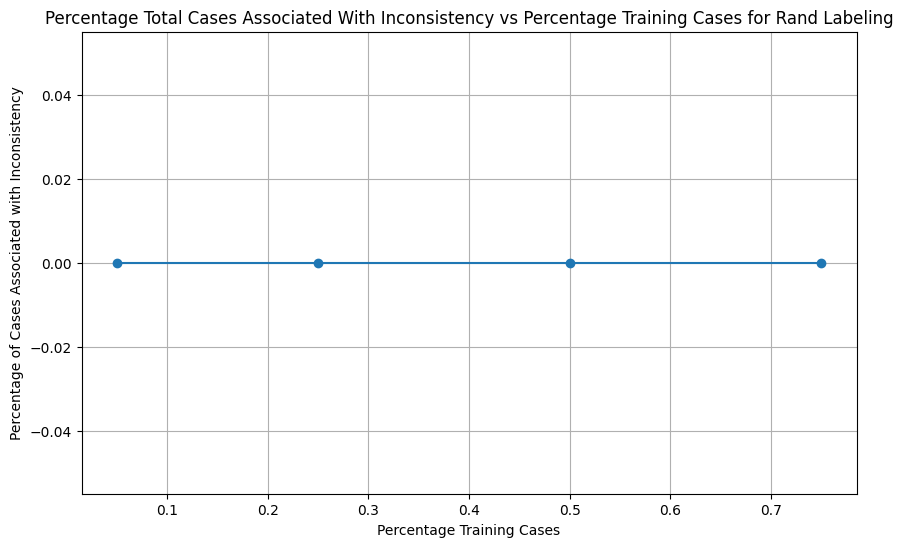

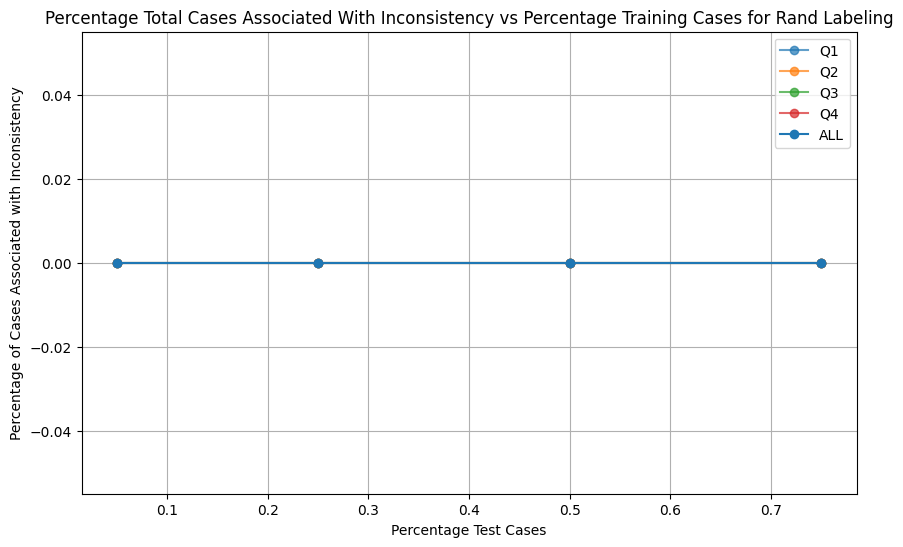

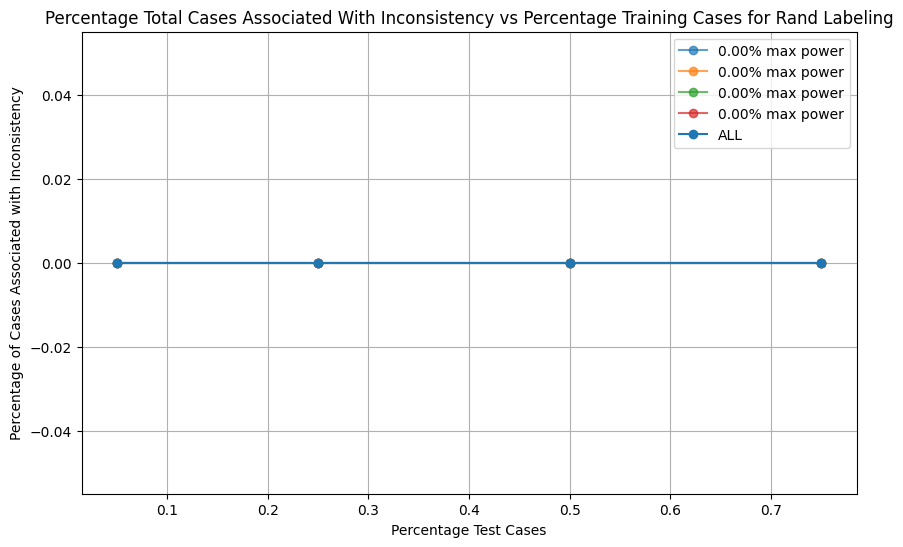

In [23]:
generate_data_and_plot("rand") # random seed = 42

Loaded data successfully from 'data/mushrooms-rand_un-test-0.05.yaml'
Number of cases:  406
Number of cases associated with inconsistency:  17
Maximum number of edges on a pi case: 9444732965464412520448
Maximum number of edges on a delta case: 9444732965722110558208
Factors for pi: 39
Factors for delta: 35
Number of cases:  0
Number of cases associated with inconsistency:  0
Maximum number of edges on a pi case: 0.0
Maximum number of edges on a delta case: 0.0
Factors for pi: 0
Factors for delta: 0
Number of cases:  30
Number of cases associated with inconsistency:  0
Maximum number of edges on a pi case: 4294959104
Maximum number of edges on a delta case: 4294705152
Factors for pi: 14
Factors for delta: 19
Number of cases:  147
Number of cases associated with inconsistency:  0
Maximum number of edges on a pi case: 4503599560261632
Maximum number of edges on a delta case: 4503599593816064
Factors for pi: 27
Factors for delta: 26
Number of cases:  283
Number of cases associated with in

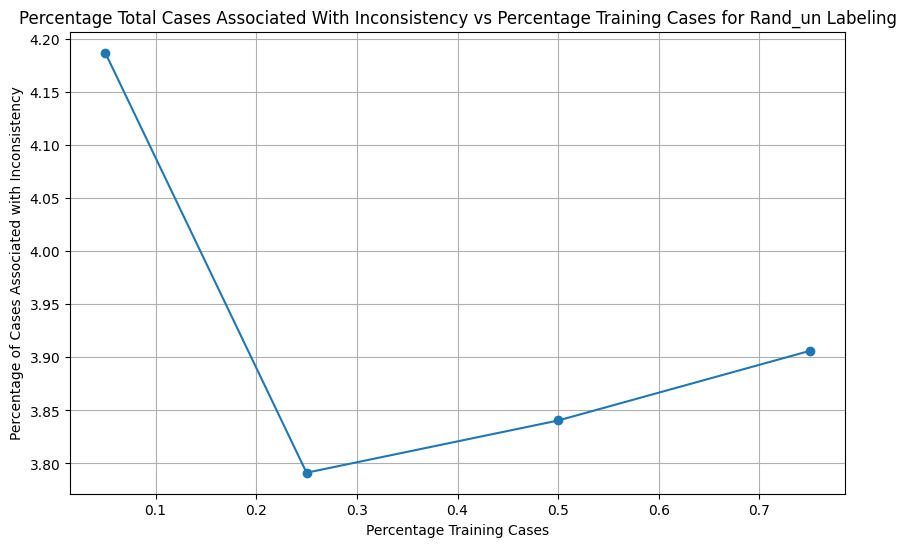

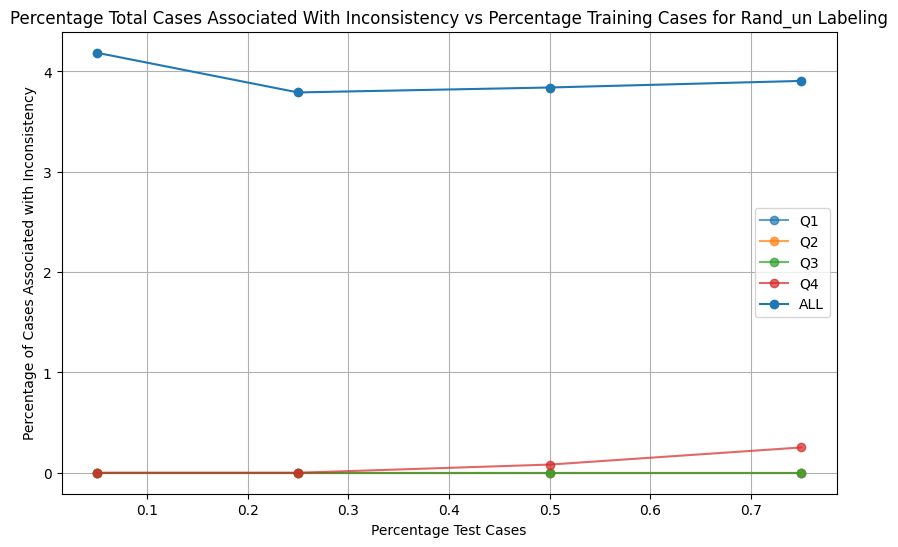

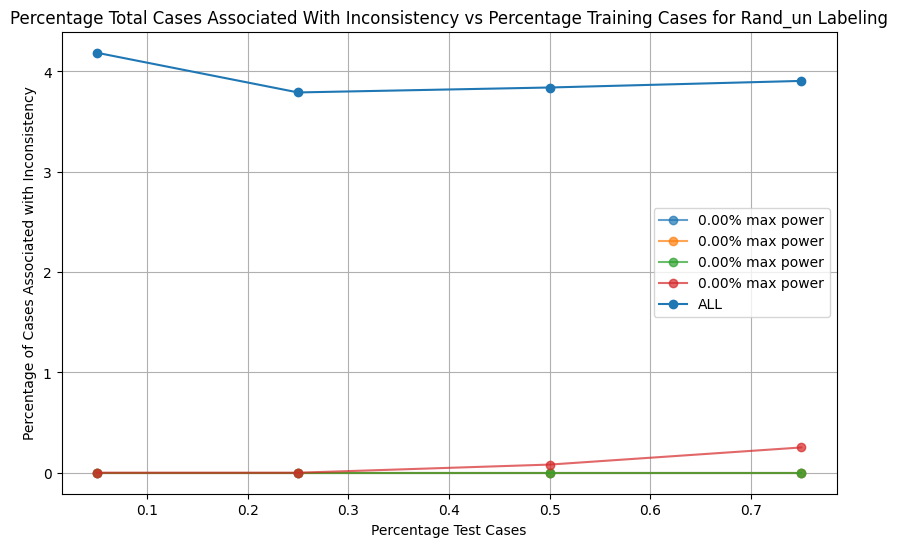

In [24]:
generate_data_and_plot("rand_un") # random seed = 42

Loaded data successfully from 'data/mushrooms-corr-test-0.05.yaml'
Number of cases:  404
Number of cases associated with inconsistency:  2
Maximum number of edges on a pi case: 151115727451824351870976
Maximum number of edges on a delta case: 151115727434236460793856
Factors for pi: 33
Factors for delta: 45
Number of cases:  151
Number of cases associated with inconsistency:  0
Maximum number of edges on a pi case: 1098974756864
Maximum number of edges on a delta case: 1099511626752
Factors for pi: 30
Factors for delta: 11
Number of cases:  164
Number of cases associated with inconsistency:  0
Maximum number of edges on a pi case: 1152921502459363328
Maximum number of edges on a delta case: 1152921504338411520
Factors for pi: 32
Factors for delta: 29
Number of cases:  247
Number of cases associated with inconsistency:  0
Maximum number of edges on a pi case: 295147905175057858560
Maximum number of edges on a delta case: 295147905144993087488
Factors for pi: 33
Factors for delta: 36
Num

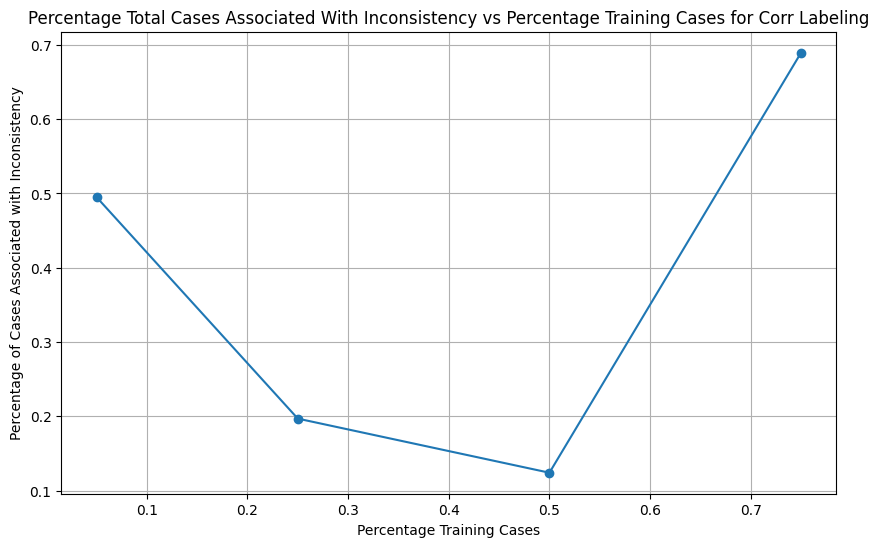

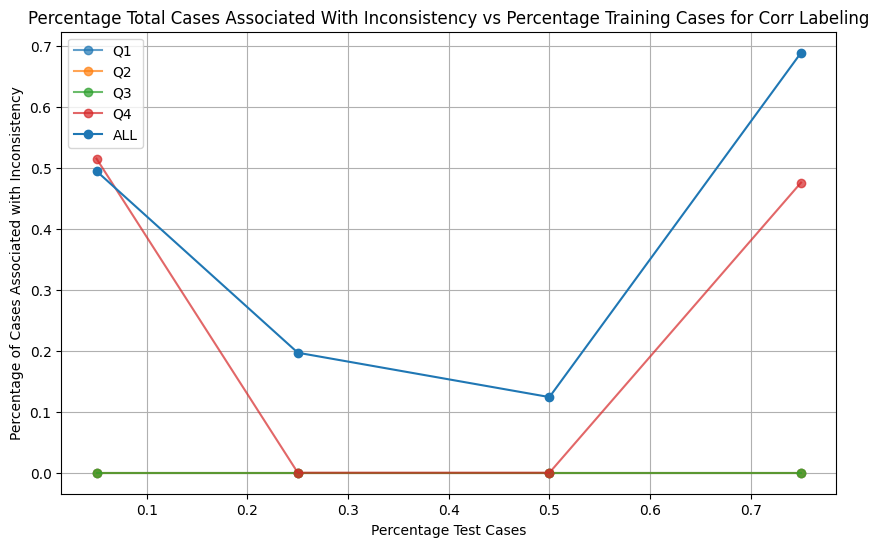

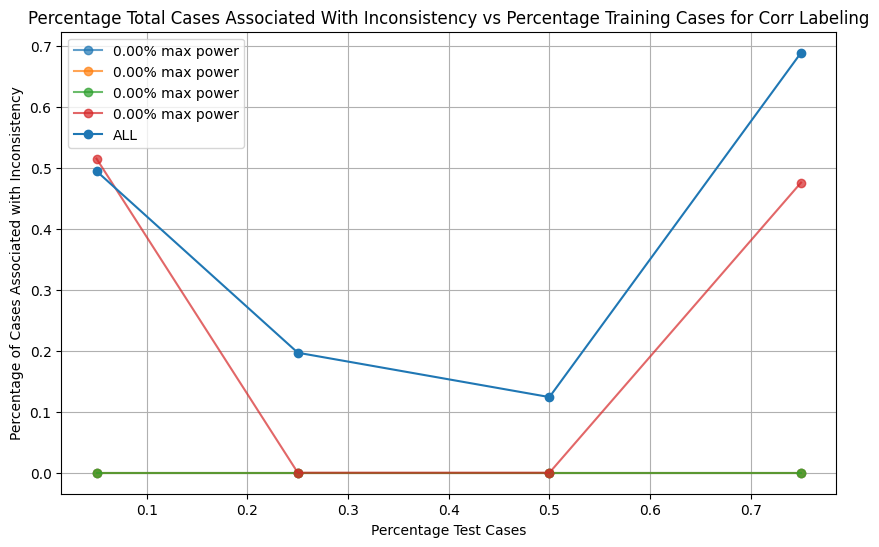

In [25]:
generate_data_and_plot("corr") 


Loaded data successfully from 'data/mushrooms-vote-test-0.05.yaml'
Number of cases:  406
Number of cases associated with inconsistency:  0
Maximum number of edges on a pi case: 324518553658426726712787276398592
Maximum number of edges on a delta case: 324518553658424420940146806882304
Factors for pi: 47
Factors for delta: 62
Number of cases:  320
Number of cases associated with inconsistency:  0
Maximum number of edges on a pi case: 316912650057057280005431623680
Maximum number of edges on a delta case: 316912650057055098574362116096
Factors for pi: 47
Factors for delta: 52
Number of cases:  403
Number of cases associated with inconsistency:  0
Maximum number of edges on a pi case: 81129638414606681625420260966400
Maximum number of edges on a delta case: 81129638414606105235036701720576
Factors for pi: 47
Factors for delta: 60
Number of cases:  406
Number of cases associated with inconsistency:  0
Maximum number of edges on a pi case: 324518553658426726712787276398592
Maximum number of

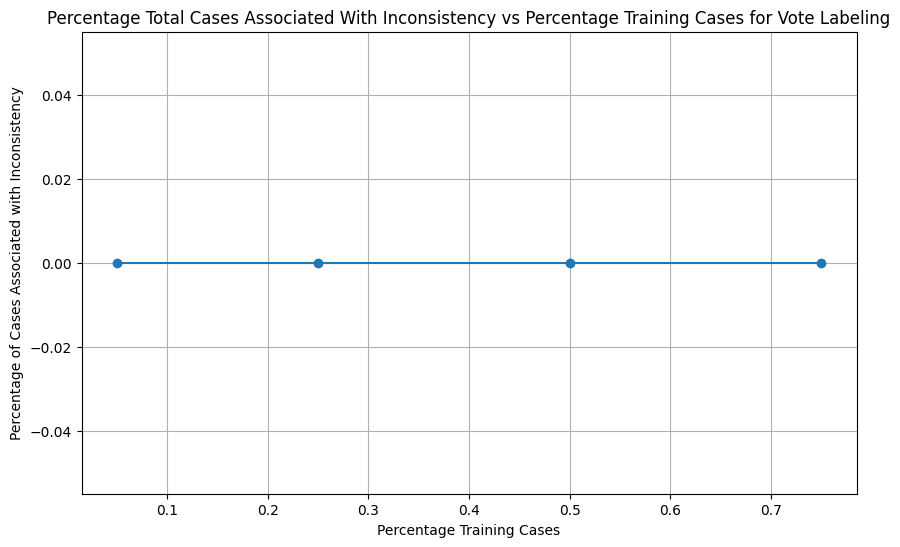

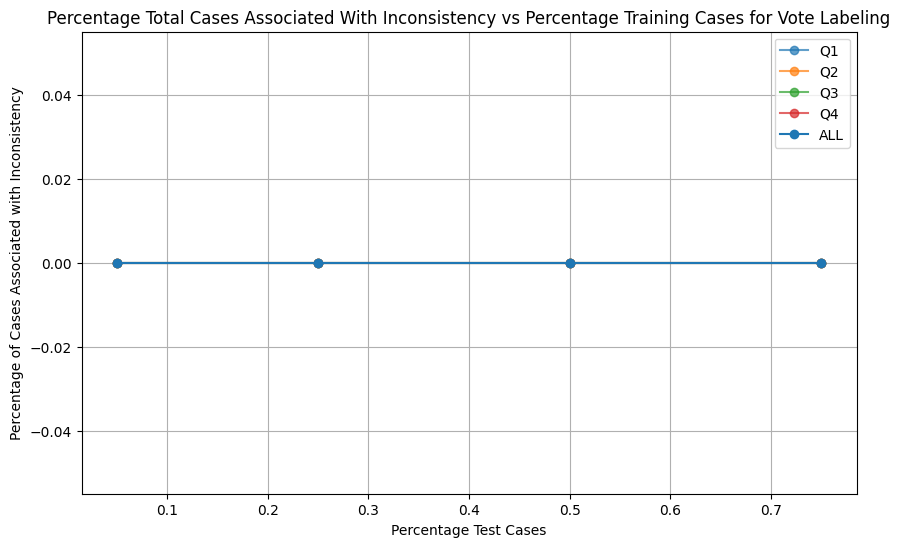

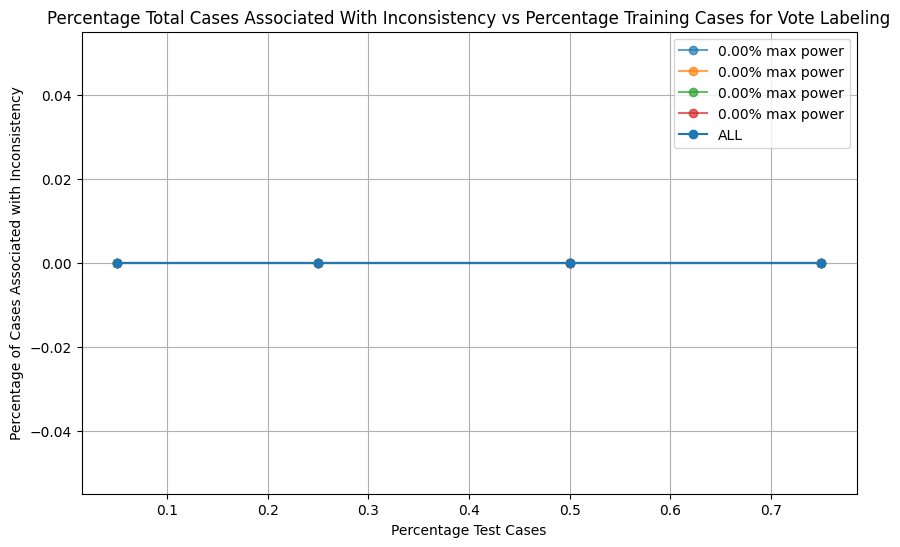

In [26]:
generate_data_and_plot("vote")
